# Predicting Heart Disease Using Age, Sex, and Chest Pain Type

### Introduction: 

Heart disease is a leading cause of death globally, accounting for millions of fatalities each year (Saloni et al., 2023). Early detection and prediction of heart disease are crucial for effective treatment and management, which can save lives and reduce healthcare costs. This project aims to predict the presence of heart disease in patients based on three key attributes: age, sex, and chest pain type using a dataset from the UCI Heart Disease dataset.

Research Question: **"Can we predict the presence of heart disease in patients based on their age, sex, and chest pain type?"**

Understanding the factors that contribute to heart disease is vital for developing predictive models. Age is a significant risk factor, with the likelihood of heart disease increasing as individuals get older (Rodgers et al., 2019). Additionally, sex differences are important; males are generally at higher risk compared to females (Rodgers et al., 2019). Chest pain type is a critical symptom, providing immediate clues about a patient's heart health (American Heart Association, 2021).


### Dataset Description
We will use the **processed.cleveland.data** dataset from the UCI Heart Disease dataset. The dataset includes 14 attributes related to patient demographics and medical information, but for this project, we will focus on:

- Age
- Sex: Gender of the patient (1 = male, 0 = female).
- Chest pain type (cp): Categorized as:
    - Typical angina
    - Atypical angina
    - Non-anginal pain
    - Asymptomatic

**Diagnosis of heart disease (num)**: Values range from 0 (no disease) to 4 (confirmed presence of heart disease).

Our goal is to build a predictive model that can accurately determine the presence of heart disease using these attributes. The binary outcome will be whether the patient has heart disease (num > 0) or not (num = 0).

### Methods

#### Data Preprocessing
1. **Load and Clean Data:**  Initially, we loaded the processed.cleveland.data dataset, a modified version of the UCI Heart Disease dataset, ensuring that necessary columns were converted into factors where appropriate. This step was crucial to prepare the dataset for subsequent analysis, ensuring consistency and compatibility with the chosen modeling approach.
2. **Data Splitting:** To evaluate the robustness and generalizability of our model, we partitioned the dataset into training and testing subsets. The training set, comprising a majority of the data, was used to train the model, while the testing set, kept aside and unseen during training, served to assess the model's performance on new, unseen data.

#### Model Building and Optimization
1. **Recipe:** A key step in our methodology was the creation of a recipe to preprocess the data. This involved centering and scaling the predictor variables, which is essential for KNN algorithms to ensure that all variables contribute equally to the distance computations and subsequent model fitting.
2. **Model Specification:** We chose the k-nearest neighbors (KNN) algorithm for classification, a non-parametric method known for its simplicity and effectiveness in pattern recognition tasks. The KNN model was specified to predict the presence or absence of heart disease based on the processed and scaled predictor variables.
3. **Cross-Validation:** To optimize the KNN model's hyperparameter (k), we employed 5-fold cross-validation. This technique partitions the training data into five subsets, iteratively using four subsets for training and the remaining subset for validation. We performed a grid search over a range of k values (from 1 to 100) during cross-validation to identify the optimal k value that maximizes model performance.

#### Visualization and Evaluation
1. **Accuracy Visualization:** Throughout the cross-validation process, we plotted accuracy estimates against different k values. This visualization helped us to understand how the model's performance varied with changes in the number of nearest neighbors considered during classification.
2. **Model Evaluation:**  After identifying the optimal k value through cross-validation, we trained the final KNN model using the entire training set. Subsequently, we evaluated the model's performance using a comprehensive set of metrics:
    - **Accuracy:** This metric gauges the overall correctness of predictions made by the model.
    - **Precision:** It measures the proportion of positive predictions that were correctly identified as true positives, thus quantifying the model's ability to avoid false positives.
    - **Recall:** This metric assesses the model's ability to correctly identify all positive instances, providing insights into its sensitivity.
    - **Confusion Matrix:** A detailed breakdown of the model's predictions across different classes (e.g., no heart disease vs. various degrees of heart disease), allowing us to analyze where the model performs well and where it struggles.

#### Loading & Cleaning The Data

In [39]:
# Load necessary libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(knitr)
library(gridExtra)
library(cowplot)
options(repr.matrix.max.rows = 6)

# Load the dataset & name the columns
col_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
               "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

heart_data <- read_csv("data/heart_disease/processed.cleveland.data", col_names = col_names, na = "?")

# Display the first few rows of the dataset
(heart_data)

# Preliminary cleaning: Convert necessary columns to factors
heart_data <- heart_data |>
  select(age, sex, cp, num) |>
  mutate(sex = as.factor(sex),
         cp = as.factor(cp),
         num = as.factor(num))

# Count of observations in each class
count_data <- heart_data |>
  group_by(num) |>
  summarise(count = n())

print(count_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0


# A tibble: 5 × 2
  num   count
  <fct> <int>
1 0       164
2 1        55
3 2        36
4 3        35
5 4        13


- **Figure 1:** Heart Dataset 
- **Figure 2:** Count of observations in each class of the data

#### Tidy the Data and Split into Training and Testing Sets

In [40]:
# Splitting the data into training and testing sets
set.seed(123)
split <- initial_split(heart_data, prop = 0.75, strata = num)
training_data <- training(split)
testing_data <- testing(split)

# Displaying the training and testing dataset
(training_data)
(testing_data)

age,sex,cp,num
<dbl>,<fct>,<fct>,<fct>
63,1,1,0
56,1,2,0
57,0,4,0
⋮,⋮,⋮,⋮
55,0,4,3
59,1,4,3
57,1,4,3


age,sex,cp,num
<dbl>,<fct>,<fct>,<fct>
37,1,3,0
41,0,2,0
63,1,4,2
⋮,⋮,⋮,⋮
58,1,4,4
63,1,4,2
68,1,4,2


- **Figure 3:** Training Data
- **Figure 4:** Testing Data

#### Summarize the Training Data

In [41]:
# Summarize the data: means of predictor variables and rows with missing data
summary_table <- training_data |>
  summarise(
    Count = n(),
    `Mean Age` = mean(age, na.rm = TRUE),
    `Male Percentage` = mean(sex == 1, na.rm = TRUE) * 100,
    `Female Percentage` = mean(sex == 0, na.rm = TRUE) * 100,
    `Typical Angina Percentage` = mean(cp == 1, na.rm = TRUE) * 100,
    `Atypical Angina Percentage` = mean(cp == 2, na.rm = TRUE) * 100,
    `Non-anginal Pain Percentage` = mean(cp == 3, na.rm = TRUE) * 100,
    `Asymptomatic Percentage` = mean(cp == 4, na.rm = TRUE) * 100,
    `Heart Disease Presence` = sum(num == "1" | num == "2" | num == "3" | num == "4", na.rm = TRUE),
    `Missing Data Rows` = sum(is.na(age) | is.na(sex) | is.na(cp))
  )

(summary_table) # Display the Results

Count,Mean Age,Male Percentage,Female Percentage,Typical Angina Percentage,Atypical Angina Percentage,Non-anginal Pain Percentage,Asymptomatic Percentage,Heart Disease Presence,Missing Data Rows
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
225,54.59111,68,32,7.111111,17.33333,28,47.55556,103,0


**Figure 5:** Summary of Training Data

#### Data Visualization

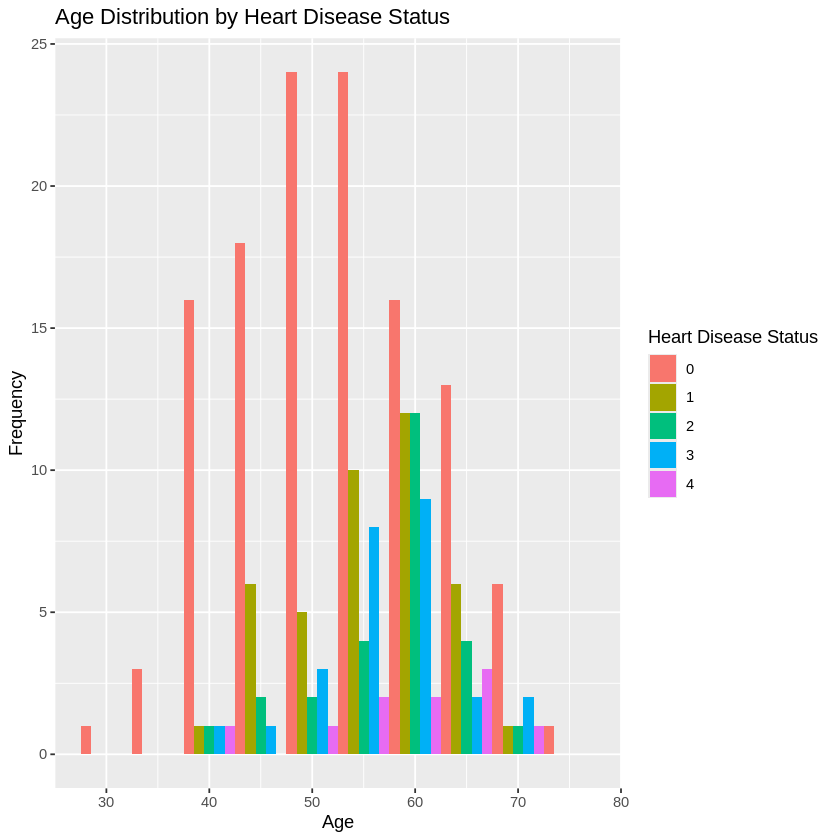

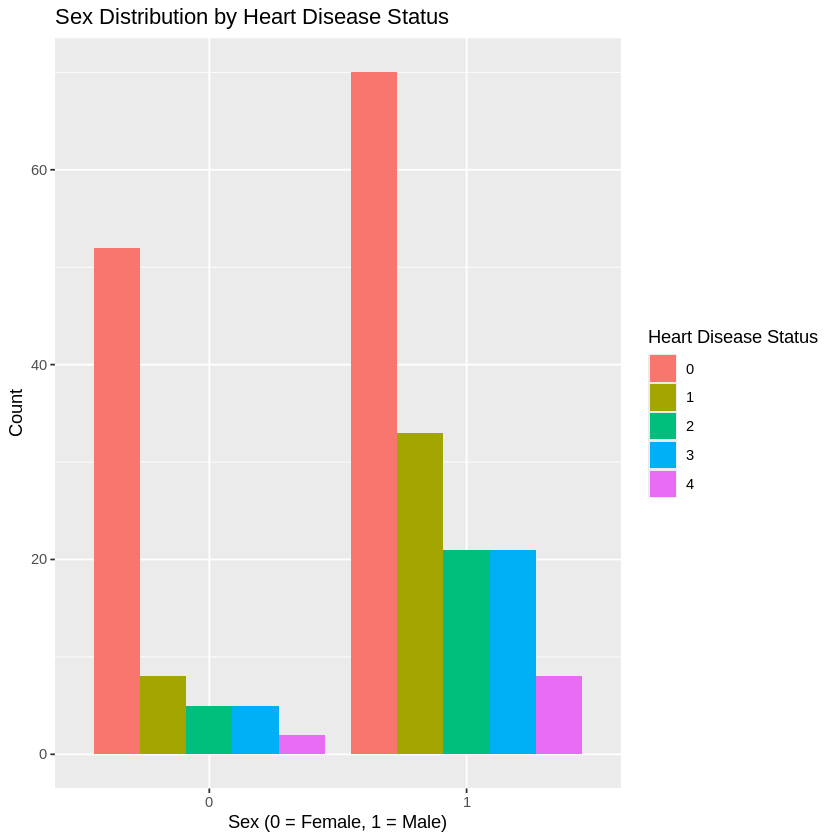

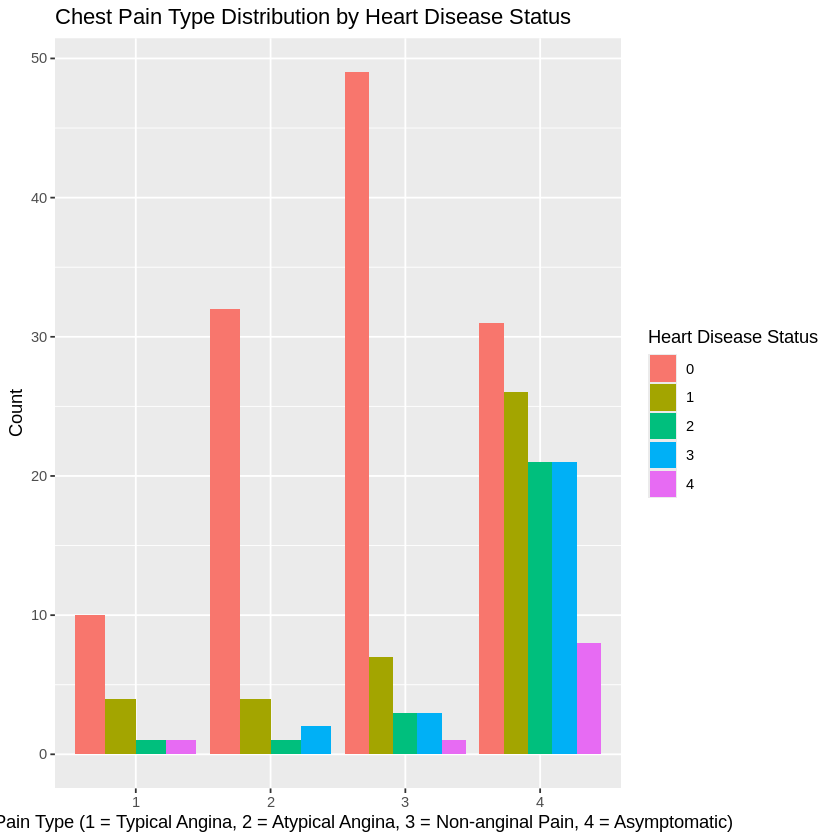

In [42]:
# Visualization using training data: Age distribution by heart disease status
# O - 4 Heart Disease Status ( 0 = None, 1 = Low, 2 = Medium, 3 = High, 4 = Confirmed Presence)
ggplot(training_data, aes(x = age, fill = num)) +
  geom_histogram(binwidth = 5, position = "dodge") +
  labs(title = "Age Distribution by Heart Disease Status",
       x = "Age",
       y = "Frequency",
       fill = "Heart Disease Status")

# Visualization using training data: Sex distribution by heart disease status
ggplot(training_data, aes(x = sex, fill = num)) +
  geom_bar(position = "dodge") +
  labs(title = "Sex Distribution by Heart Disease Status",
       x = "Sex (0 = Female, 1 = Male)",
       y = "Count",
       fill = "Heart Disease Status")

# Visualization using training data: Chest pain type distribution by heart disease status
ggplot(training_data, aes(x = cp, fill = num)) +
  geom_bar(position = "dodge") +
  labs(title = "Chest Pain Type Distribution by Heart Disease Status",
       x = "Chest Pain Type (1 = Typical Angina, 2 = Atypical Angina, 3 = Non-anginal Pain, 4 = Asymptomatic)",
       y = "Count",
       fill = "Heart Disease Status")

- **Figure 6:** Age Distribution by Heart Disease Status
    - This histogram shows the distribution of ages in the training dataset, colour-coded by heart disease status (0-4). The graph indicates that the majority of patients fall within the 50-70 age range, with varying degrees of heart disease status. Notably, those with a heart disease status of 0 (no disease) are spread across a wide range of ages, while higher statuses appear more concentrated in older age groups.
- **Figure 7:** Sex Distribution by Heart Disease Status
    - This bar chart depicts the distribution of sex (0 = female, 1 = male) in relation to heart disease status (0-4). Males (sex = 1) have a higher incidence of heart disease across all statuses compared to females (sex = 0), reflecting known medical trends.
- **Figure 8:** Chest Pain Type Distribution by Heart Disease Status
    - This bar chart shows the distribution of chest pain types across different heart disease statuses (0-4). Typical angina is more common in higher heart disease statuses, while non-anginal pain and asymptomatic cases are less frequent, indicating a correlation between chest pain type and heart disease likelihood.

### Building the Model

We'll first create a recipe to standarize the predictor variables.

In [43]:
# Set seed for reproducibility
set.seed(123)

# Convert sex and cp to numeric
training_data <- training_data %>%
    mutate(across(c(sex, cp), as.numeric))

testing_data <- testing_data %>%
    mutate(across(c(sex, cp), as.numeric))

# Create a recipe
heart_disease_recipe <- recipe(num ~ age + sex + cp, data = training_data) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

# View the recipe
heart_disease_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Centering for: all_predictors()

• Scaling for: all_predictors()



### Model Specification
We'll specify the K-NN Model with a tunable number of neighbors

In [44]:
# Specify the k-NN model
heart_disease_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# View the model specification
heart_disease_spec


K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


### Cross Validation Workflow

We'll perform cross-validation with 5 folds for K values ranging from 1 to 100

In [45]:
# Cross-validation setup
set.seed(123)
heart_disease_vfold <- vfold_cv(training_data, v = 5, strata = num)

# Define a grid of k values
k_grid <- tibble(neighbors = seq(1, 100, by = 1))

# Workflow
heart_disease_workflow <- workflow() |>
    add_recipe(heart_disease_recipe) |>
    add_model(heart_disease_spec)

# Tune the model
heart_disease_results <- heart_disease_workflow |>
    tune_grid(resamples = heart_disease_vfold, grid = k_grid) |>
    collect_metrics()

# Filter for accuracy metrics and find the best k value
accuracies <- heart_disease_results |>
    filter(.metric == "accuracy") |>
    arrange(desc(mean))

# Best k value
best_k <- accuracies |>
    slice(1) |>
    pull(neighbors)

print(best_k)


→ A | warning: No observations were detected in `truth` for level(s): '4'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





[1] 6


### Visualization of Accuracy

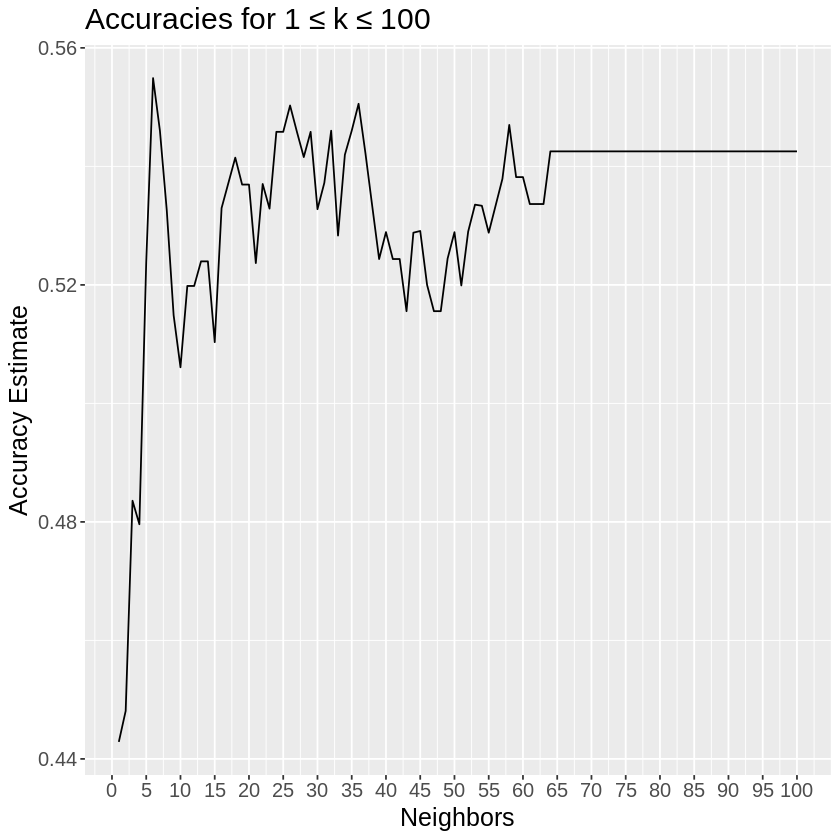

In [46]:
# Visualize accuracy vs k values
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracies for 1 ≤ k ≤ 100") +
    scale_x_continuous(breaks = seq(0, 100, by = 5)) +
    theme(text = element_text(size = 15))

print(accuracy_versus_k)

**Figure 9:** Line Plot for Accuracy vs K Values
- **Trend Observation:** The line plot shows how the accuracy changes as the value of K increases. Initially, for lower values of K, the model tends to overfit the data, resulting in high variance and potentially higher accuracy on the training set but lower on the test set. As K increases, the model starts to generalize better, reducing the variance but potentially increasing bias.
- **Optimal K-value:** The peak of the curve indicates the K-value that provides the highest accuracy on the validation data.

### Building the Final Model with the Best K Value

We'll build the final K-NN model using the best K value identified

In [49]:
# Final model with best k value
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

final_model <- workflow() |>
  add_recipe(heart_disease_recipe) |>
  add_model(final_spec) |>
  fit(data = training_data)

final_model

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(6,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4266667
Best kernel: rectangular
Best k: 6

### Model Evaluation

#### Accuracy
- Assessing accuracy to gauge overall model performance.

In [50]:
# Evaluate accuracy on the training and testing sets
train_predictions <- predict(final_model, training_data) |>
  bind_cols(training_data) |>
  metrics(truth = num, estimate = .pred_class)

test_predictions <- predict(final_model, testing_data) |>
  bind_cols(testing_data) |>
  metrics(truth = num, estimate = .pred_class)

# Display accuracy
train_accuracy <- train_predictions |>
  filter(.metric == "accuracy")

test_accuracy <- test_predictions |>
  filter(.metric == "accuracy")

train_accuracy
test_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.6577778


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5384615


- **Figure 10:** Accuracy Table (Training)
- **Figure 11:** Accuracy Table (Testing)

#### Precision
- Measuring precision to evaluate model's exactness in positive predictions.

In [51]:
# Make predictions
train_predictions <- predict(final_model, training_data)
test_predictions <- predict(final_model, testing_data)

# Combine predictions with actual values
train_results <- bind_cols(training_data, train_predictions)
test_results <- bind_cols(testing_data, test_predictions)

# Calculate precision
train_precision <- precision(data = train_results, truth = num, estimate = .pred_class)
test_precision <- precision(data = test_results, truth = num, estimate = .pred_class)

train_precision
test_precision

Warning message:
“While computing multiclass `precision()`, some levels had no predicted events (i.e. `true_positive + false_positive = 0`). 
Precision is undefined in this case, and those levels will be removed from the averaged result.
Note that the following number of true events actually occured for each problematic event level:
'4': 10”
Warning message:
“While computing multiclass `precision()`, some levels had no predicted events (i.e. `true_positive + false_positive = 0`). 
Precision is undefined in this case, and those levels will be removed from the averaged result.
Note that the following number of true events actually occured for each problematic event level:
'4': 3”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.5822549


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.3181511


- **Figure 12:** Precision Table (Training)
- **Figure 13:** Precision Table (Testing)

#### Recall
- Calculating recall to measure the model's ability to find true positives.

In [52]:
# Calculate recall for training data
train_recall <- training_data |>
  bind_cols(predict(final_model, training_data) |>
              select(.pred_class)) |>
  recall(truth = num, estimate = .pred_class)

# Calculate recall for testing data
test_recall <- testing_data |>
  bind_cols(predict(final_model, testing_data) |>
              select(.pred_class)) |>
  recall(truth = num, estimate = .pred_class)

# Display recall
train_recall
test_recall

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,macro,0.4094485


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,macro,0.2685714


- **Figure 14:** Recall Table (Training)
- **Figure 15:** Recall Table (Testing)

### Confusion Matrix

Now, let's add the confusion matrix.
- This allows us to  visualize the model's performance across classes.

In [53]:
# Ensure the test_predictions contains both the truth and the predictions
test_predictions <- testing_data |>
  bind_cols(predict(final_model, testing_data) %>% 
              select(.pred_class))

# Confusion matrix for test set
conf_mat <- test_predictions %>%
    conf_mat(truth = num, estimate = .pred_class)

# Print confusion matrix
print(conf_mat)

          Truth
Prediction  0  1  2  3  4
         0 36  9  7  5  0
         1  3  4  1  3  2
         2  1  1  2  1  1
         3  2  0  0  0  0
         4  0  0  0  0  0


- **Figure 16:** Confusion Matrix

### Discussion 

In this project, we set out to predict the presence of heart disease in patients based on their age, sex, and chest pain type using the processed.cleveland.data dataset. The main goal was to build a predictive model and evaluate its performance through various metrics, including accuracy, precision, recall, and a confusion matrix. Below is a summary of our findings and an analysis of the results.

#### Summary of Findings 
1. **Accuracy:** The accuracy of the model was found to be 53.85%. This indicates that the model correctly predicted the presence of heart disease slightly more than half of the time. While this is better than random guessing, it is not sufficiently high for clinical applications where higher accuracy is crucial.
- **Training Accuracy:** 65.78%
- **Testing Accuracy:** 53.85%

2. **Precision:** The macro-averaged precision of the model was 31.82%. Precision measures the proportion of positive identifications that were actually correct. A low precision suggests that the model is prone to false positives.
- **Training Precision:** 58.23%
- **Testing Precision:** 31.82%

3. **Recall** The macro-averaged recall of the model was 26.86%. Recall measures the proportion of actual positives that were correctly identified by the model. A low recall indicates that the model misses a significant number of true positive cases.
- **Training Recall:** 40.94%
- **Testing Recall:** 26.86%

4. **Confusion Matrix:** The confusion matrix provides a detailed breakdown of the model's performance across different classes. The majority of correct predictions were for class 0 (no heart disease), but performance degraded significantly for classes 1 to 4, which indicate varying degrees of heart disease presence.
- **Confusion Matrix Results:**
    - True Negatives (Class 0): 36
        - The model correctly identified 36 instances where individuals were free from heart disease (Class 0), aligning with their actual condition.
    - False Positives (Class 0 predicted as 1-4): 24
        - In 24 cases, the model incorrectly predicted the presence of heart disease (Classes 1-4) when the individuals were actually healthy (Class 0), indicating a tendency for false alarms.
    - True Positives for Class 1: 4
        - The model accurately identified 4 instances of Class 1 heart disease
    - True Positives for Class 2: 2
        - The model accurately identified 2 instances of Class 2 heart disease
    - True Positives for Class 3: 0
        - Predicting no instances for Class 3 
    - True Positives for Class 4: 0
        - Predicting no instances for Class 4
Our model demonstrated strengths in accurately identifying individuals without heart disease (True Negatives) and detecting some cases of heart disease (True Positives). However, it exhibited limitations with false positive predictions, indicating the need for further refinement to improve specificity and reduce diagnostic errors.

#### Discussion of Results: 
- **Expected Findings:** The results, though somewhat aligned with expectations, reveal that the K-Nearest Neighbors (KNN) classifier struggles to effectively distinguish between the various classes of heart disease. This was expected to some extent, given the complexity of medical data and the relatively simplistic nature of KNN. However, the extent of misclassification suggests that further refinement is necessary.
  
- **Impact of Findings:** The implications of our findings are significant for the field of healthcare and machine learning applications in clinical settings. With an accuracy of 53.85%, the current model's reliability for supporting critical clinical decisions is limited. Such performance may lead to misdiagnoses, either by failing to detect actual heart disease cases or by incorrectly labeling healthy individuals as having heart disease. This underscores the need for more refined models that can better capture the intricacies of heart disease diagnosis.

- **Future Questions:** To improve and advance our research:
    1. **Improving Class Imbalance Handling:** How can machine learning models effectively handle class imbalance in heart disease prediction, particularly improving recall for classes representing varying degrees of heart disease severity (e.g., Class 1 to Class 4)?
       
    2. **Feature Selection for Enhanced Discrimination:** Which specific features or combinations of features (e.g., demographic factors, symptomatology, diagnostic tests) contribute most significantly to accurate predictions of different types and stages of heart disease, thereby improving precision in the predictive model?
     
    3. **Clinical Validation and Adaptation:** How can predictive models trained on processed.cleveland.data be validated and adapted for use in diverse clinical settings, considering factors such as patient demographics, healthcare infrastructure, and regional variations in heart disease prevalence and treatment protocols?

- **Future Directions:** To improve the model, several strategies can be considered:
    1. **Feature Engineering:** Incorporating additional relevant features and transforming existing ones to better capture the underlying patterns in the data.

    2. **Advanced Models:** Exploring more complex models which might better capture the nuances in the data.
     
    3. **Hyperparameter Tuning:** Further tuning of model parameters, including K values beyond the range initially considered.
     
    4. **Ensemble Methods:** Combining multiple models to improve overall performance through techniques like bagging and boosting.
     
    5. **Data Augmentation:** Increasing the dataset size or using techniques such as synthetic data generation to provide the model with more training examples.

By implementing these improvements, it is likely that the model's performance can be enhanced, leading to more reliable predictions.

### References
- American Heart Association. (2021). Angina (Chest Pain). Retrieved from https://www.heart.org/en/health-topics/heart-attack/angina-chest-pain 
- Janosi, Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository.
  https://doi.org/10.24432/C52P4X.
- Rodgers, J. L., Jones, J., Bolleddu, S. I., Vanthenapalli, S., Rodgers, L. E., Shah, K., Karia, K., & Panguluri, S. K. (2019). Cardiovascular Risks Associated with Gender and Aging. Journal of cardiovascular development and disease, 6(2), 19. https://doi.org/10.3390/jcdd6020019
- Saloni Dattani, Fiona Spooner, Hannah Ritchie and Max Roser (2023) - “Causes of Death” Published online at OurWorldInData.org. https://ourworldindata.org/causes-of-death